In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV , RandomizedSearchCV,validation_curve
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
import pickle
import lmdiag
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import validation_curve
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [3]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [5]:
df.duplicated().sum()

25

In [6]:
df.drop_duplicates(inplace=True)

### Pairplot

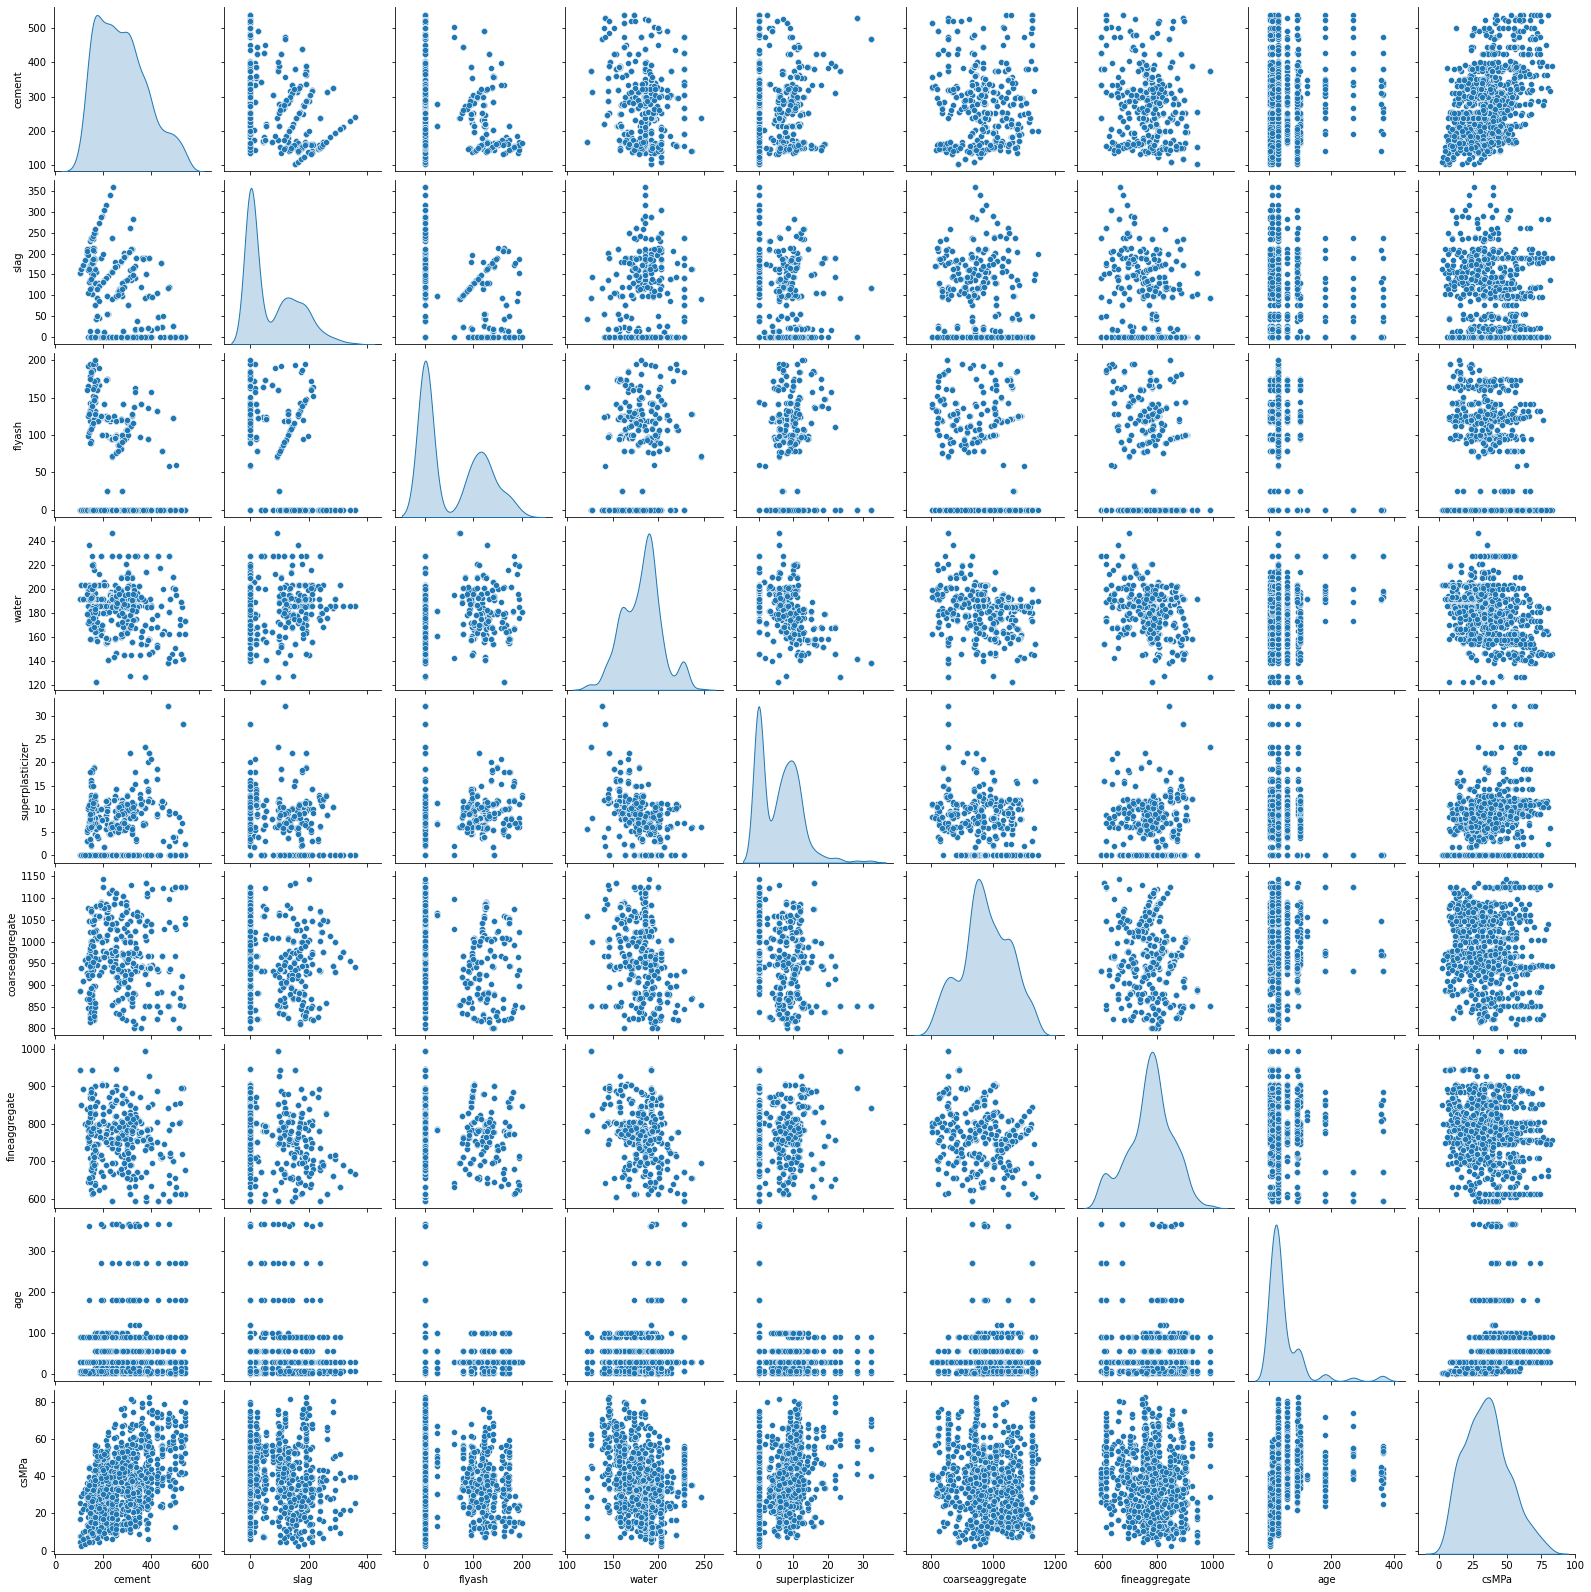

In [7]:
sns.pairplot(df,diag_kind='kde')
plt.show()

### Heatmap

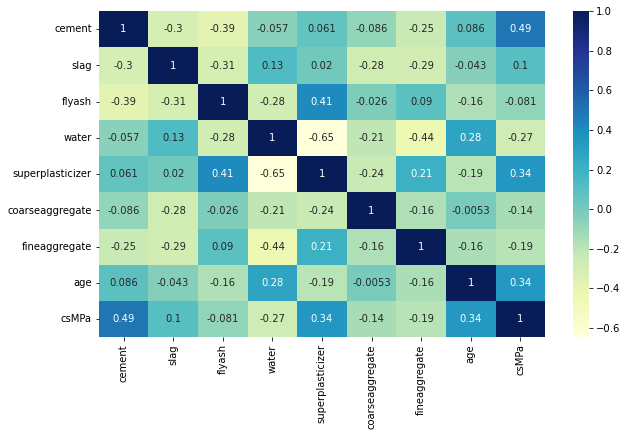

In [8]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Distribution of each variable

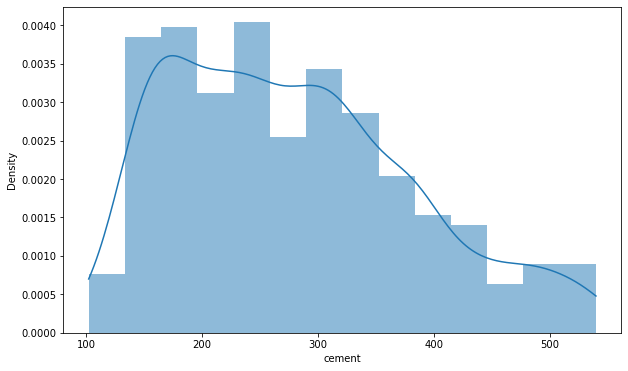

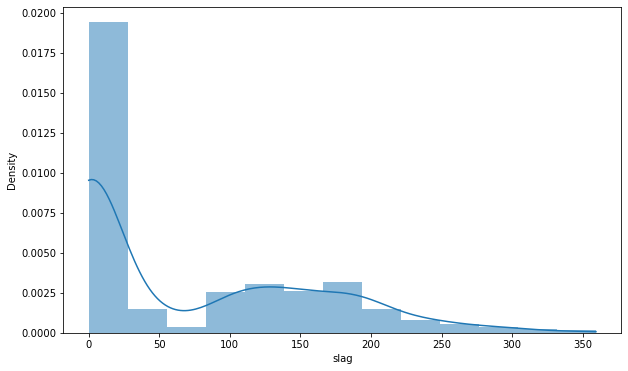

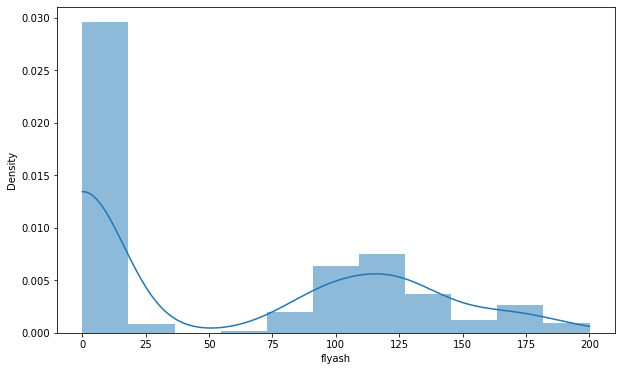

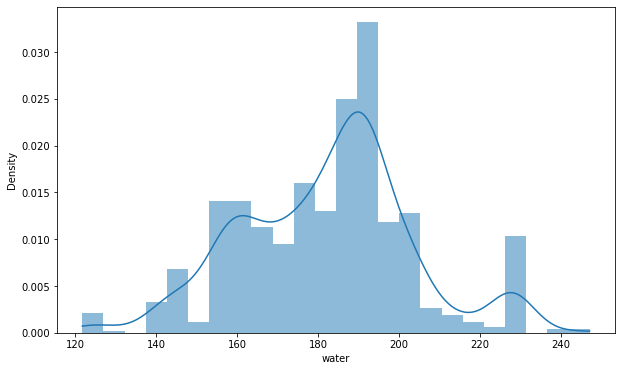

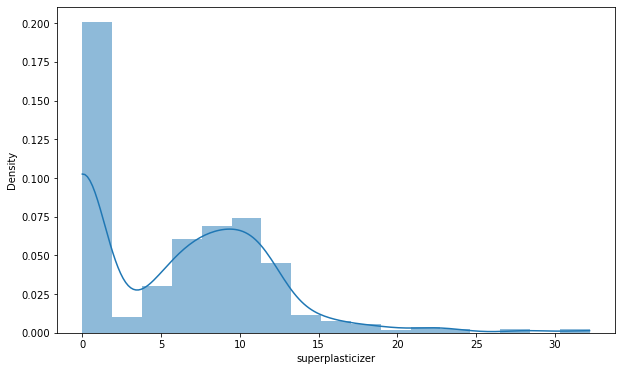

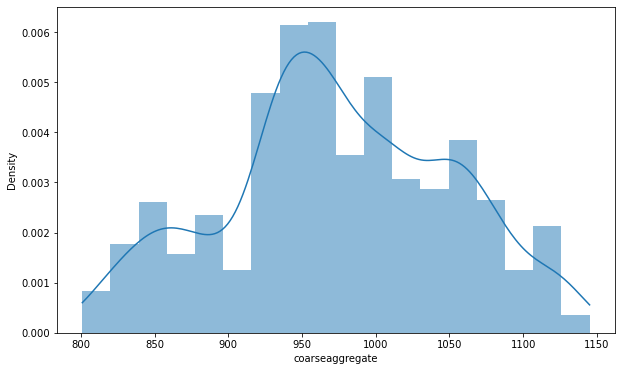

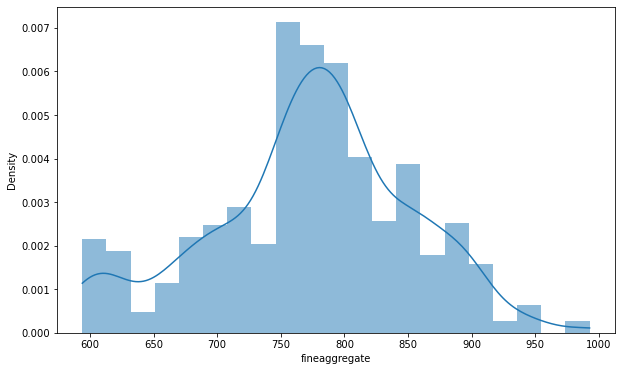

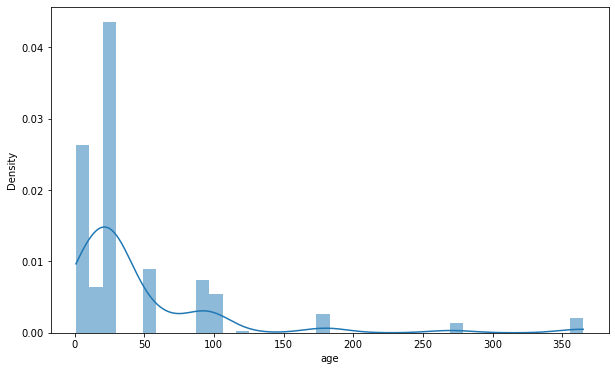

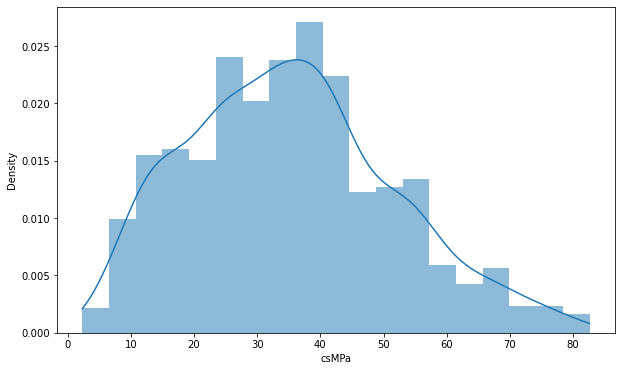

In [9]:
for i in df.columns:
    plt.subplots(figsize=(10,6))

    sns.histplot(df[i],kde=True, stat="density", linewidth=0)
    plt.show()

### QQplot

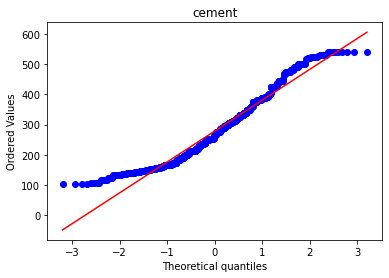

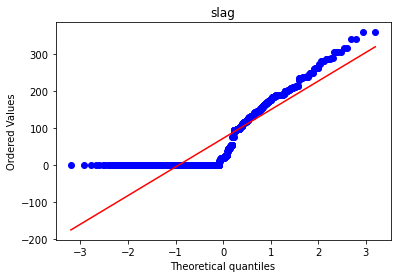

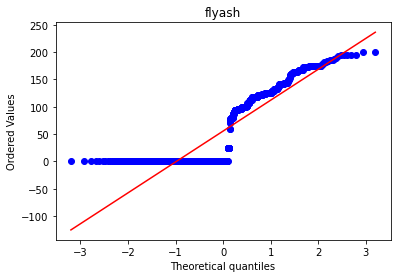

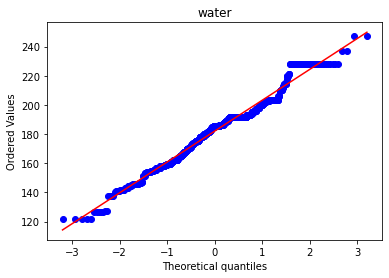

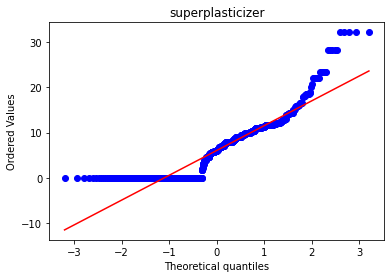

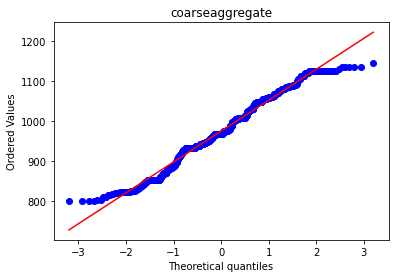

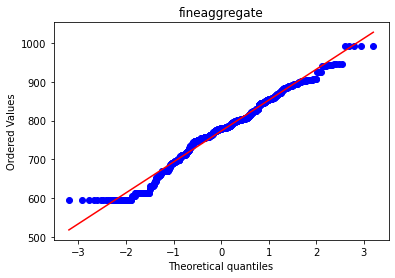

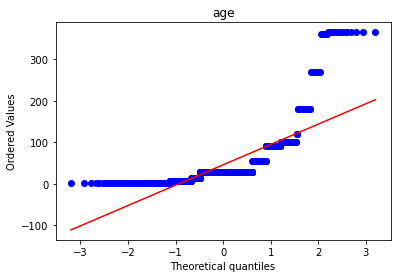

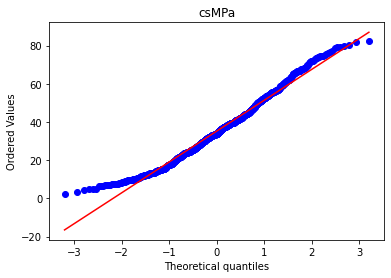

In [10]:
for i in df.columns:
    plt.subplots(figsize=(6,4))
    stats.probplot(df[i], dist="norm", plot=pylab)
    pylab.title(i)
    pylab.show()

### Box plots

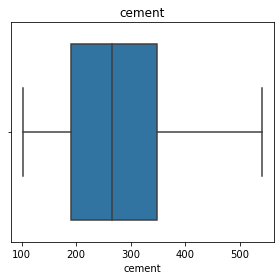

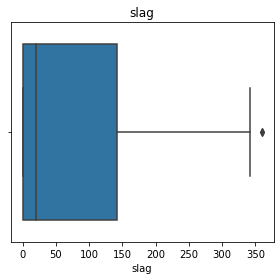

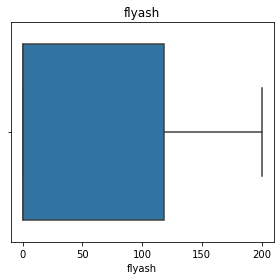

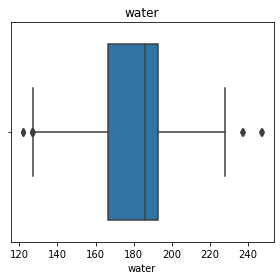

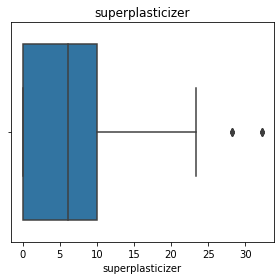

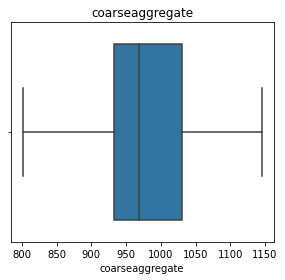

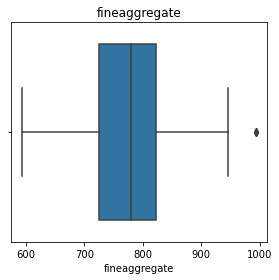

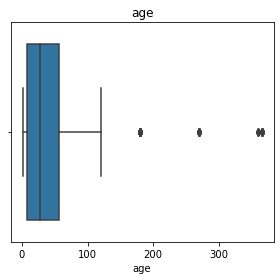

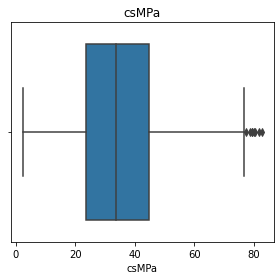

In [11]:
for i in df.columns:
    plt.subplots(figsize=(4,4))
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.tight_layout()
    plt.show()

### Relationship between input and output variables

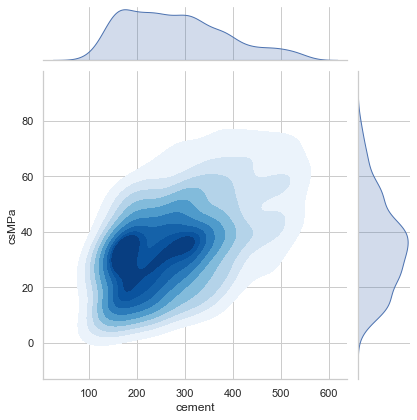

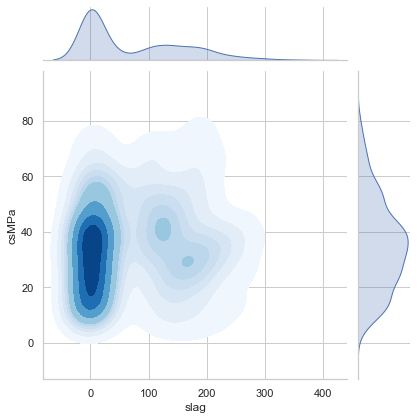

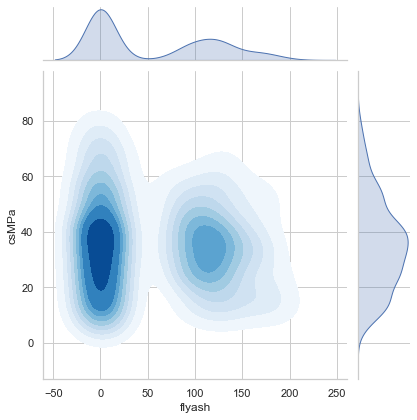

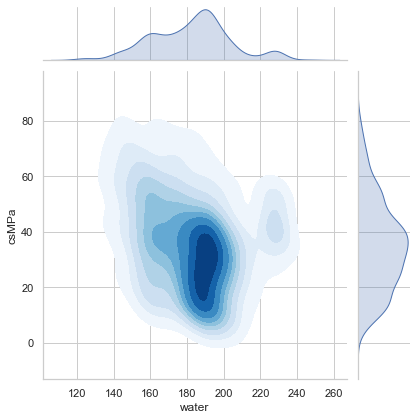

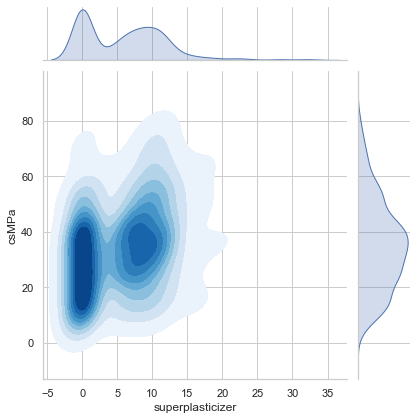

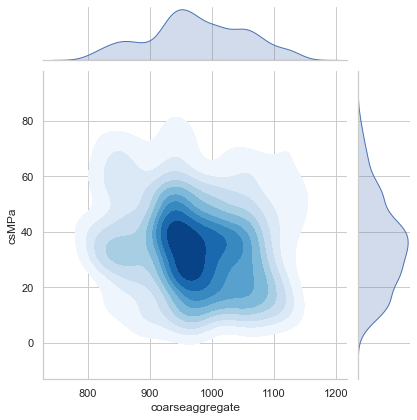

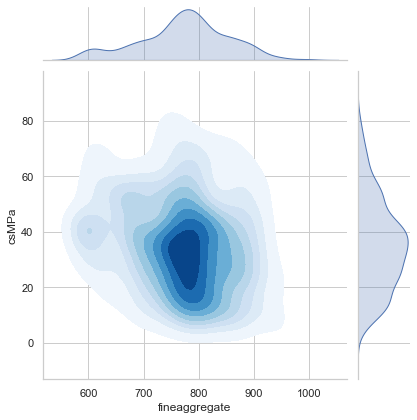

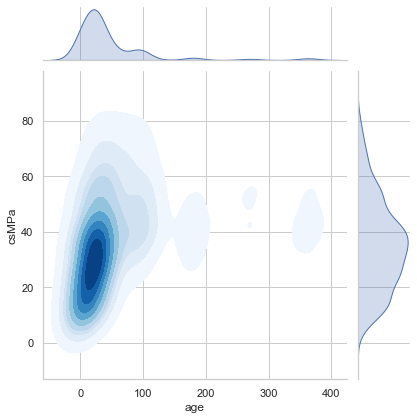

In [12]:
sns.set(style="whitegrid")

cols=df.columns[:-1]
for i in cols:
    sns.jointplot(x=df[i], y=df["csMPa"], kind="kde", cmap="Blues", fill=True)
    plt.show()

## Data  Spliting , Data Preprocessing, Model Construction with Pipeline

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [14]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (854, 8)
X_test.shape: (151, 8)
y_train.shape: (854,)
y_test.shape: (151,)


### Linear Regression using Statsmodel
we are going to use statsmodel first only for linear regression to just get the coefficients nicely,because the output that statsmodel gives us is very explainable and we are able to see the significant coefficients

In [15]:
sd=MinMaxScaler()
X_scaled_stats=pd.DataFrame(sd.fit_transform(X),columns=X.columns)
X_scaled_stats=sm.add_constant(X_scaled_stats)
linear_stats=sm.OLS(y.values,X_scaled_stats)
linear_model=linear_stats.fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sun, 15 May 2022   Prob (F-statistic):          2.40e-194
Time:                        10:53:00   Log-Likelihood:                -3764.4
No. Observations:                1005   AIC:                             7547.
Df Residuals:                     996   BIC:                             7591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9470      8.237     -0.115      0.908     -17.110      15.216
cement              51.3520      3.721     13.802      0.000      44.051      58.653
slag                35.7481      3.650      9.793      0.000      28.585      42.912
flyash              17.1333      2.497      6.863      0.000      12.234      22.032
water              -19.0613      4.983     -3.825      0.000     -28.839      -9.283
superplasticizer     9.1749      2.991      3.067      0.002       3.305      15.045
coarseaggregate      5.3932      3.206      1.682      0.093      -0.898      11.684
fineaggregate        7.3061      4.255      1.717      0.086      -1.043      15.655
age                 40.8327      1.963     20.801      0.000      36.981      44.685
==============================================================================
Omnibus:                        4.033   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.922
Skew:                          -0.150   Prob(JB):                        0.141
Kurtosis:                       3.062   Cond. No.                         51.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

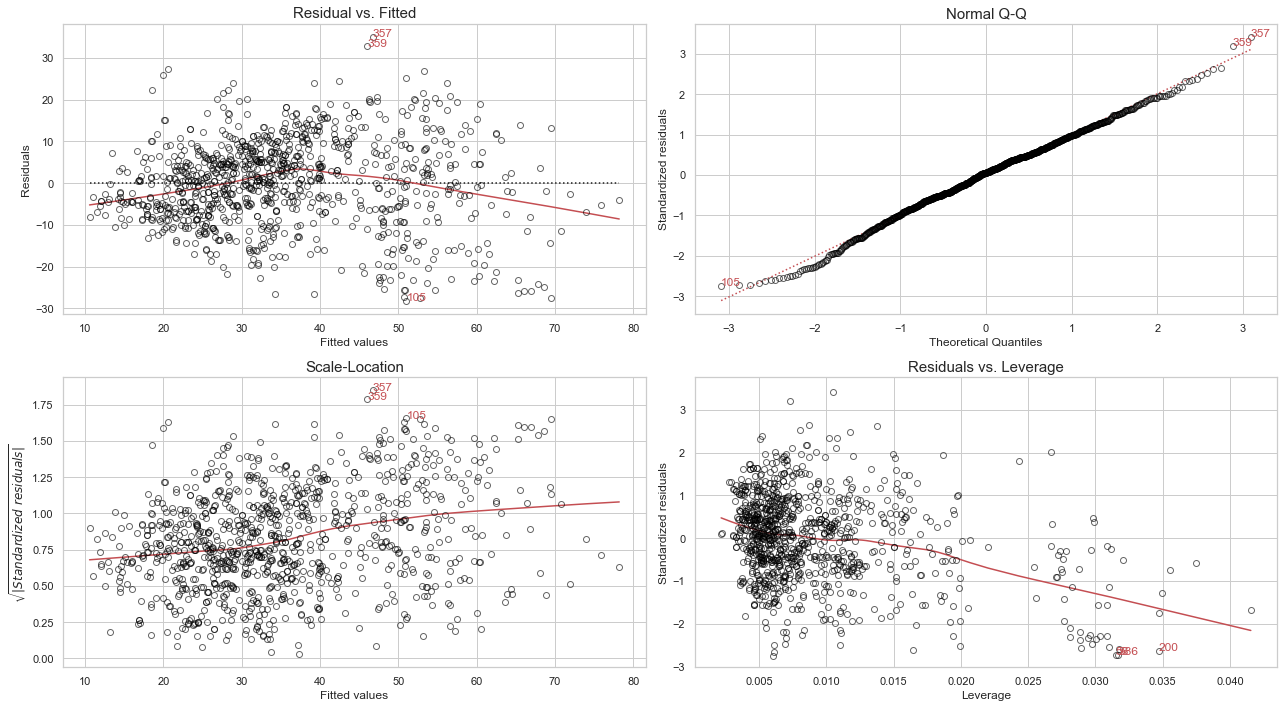

In [16]:
plt.subplots(figsize=(18,10))
lmdiag.plot(linear_model)

plt.tight_layout()
plt.show()

### Intepreting the diagnostic plots above
##### Residuals vs Fitted:
The red line(Loess curve) helps us assess linearity and if the line is mostly straight and cuts across the graph around y=0, the relationship between input and output is linear, for this example we can conclude that the relationship is almost linear.
To assess the equality of the variance we can look at the distribution of the points and we can see that the distribution is almost the same all across the graph, therefore the variance is equall.
<br>
##### Normal QQ-plot:
We can see that our model is normally distributed meaning that the coefficient estimates are affected, and the coefficient hypothesis tests is more trustworthy because the standard errors of the t-tests will not be too small.
<br>
##### Scale location:
We can see this plot is the same as residuals vs fitted and the only difference is that the residuals on the y axis are standardized.
<br>
##### Residuals vs Levarage:
This plolt shows the outliers on Y given X, and it measures the cooks distance, we can see the graph is not showing any major outliers.

eval_env: 1


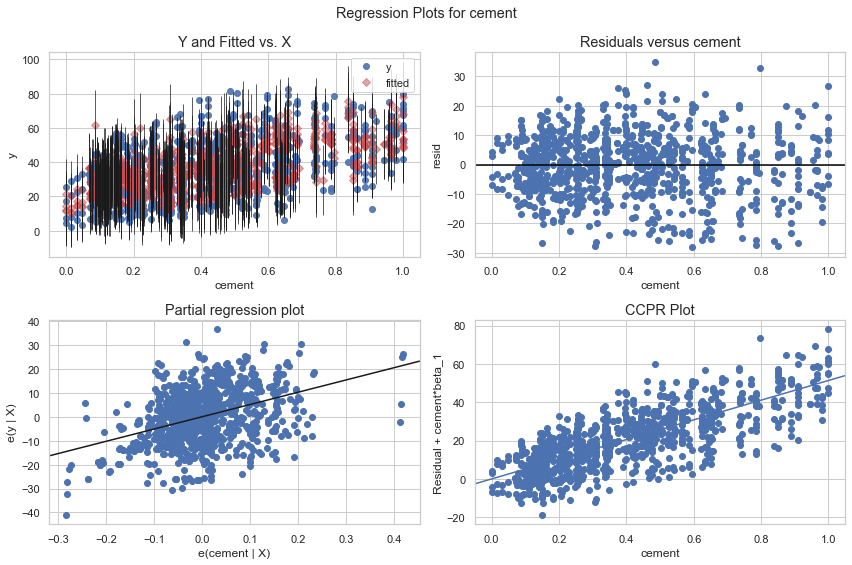

eval_env: 1


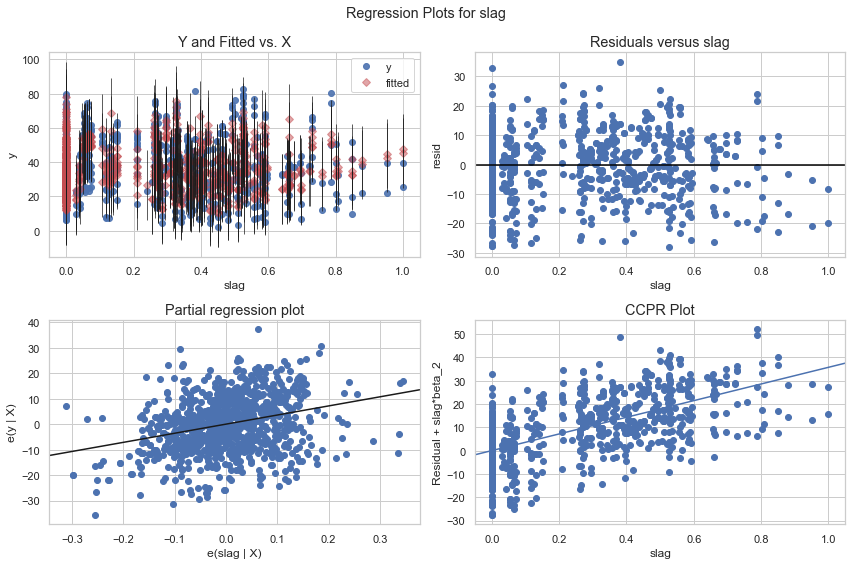

eval_env: 1


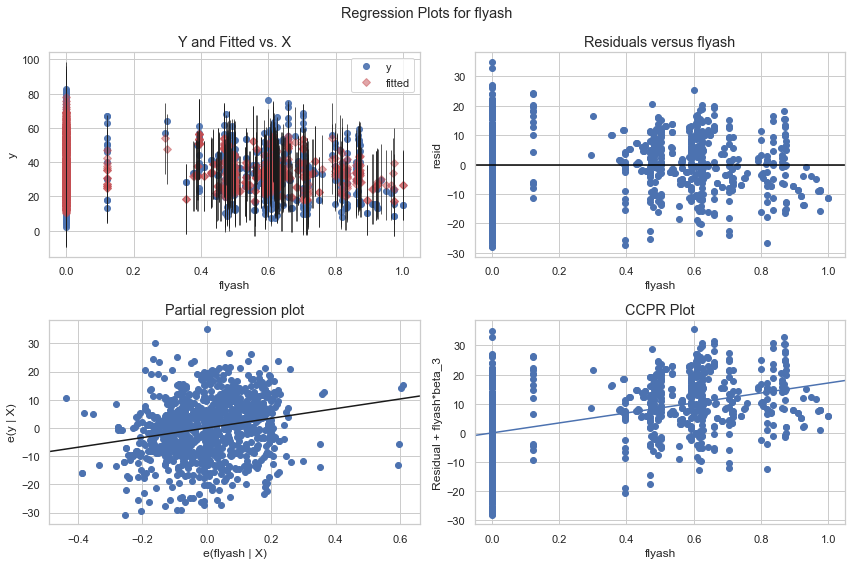

eval_env: 1


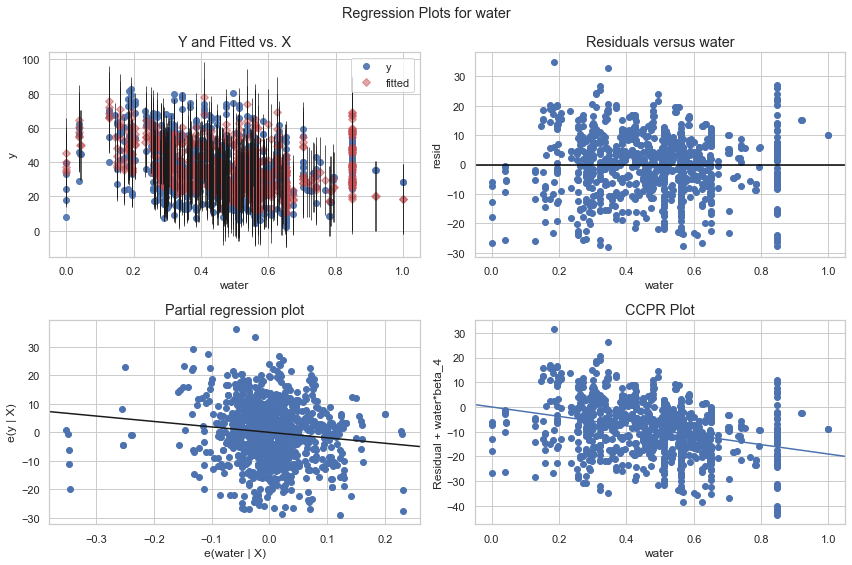

eval_env: 1


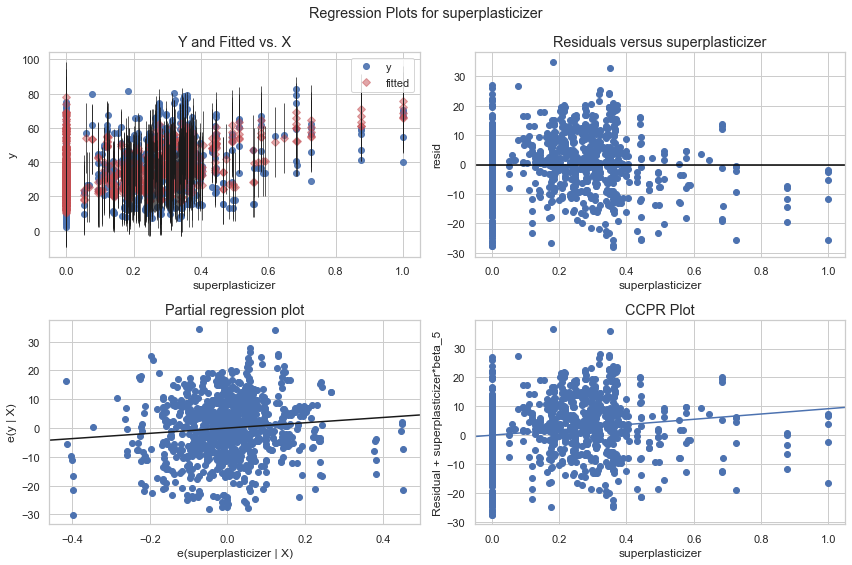

eval_env: 1


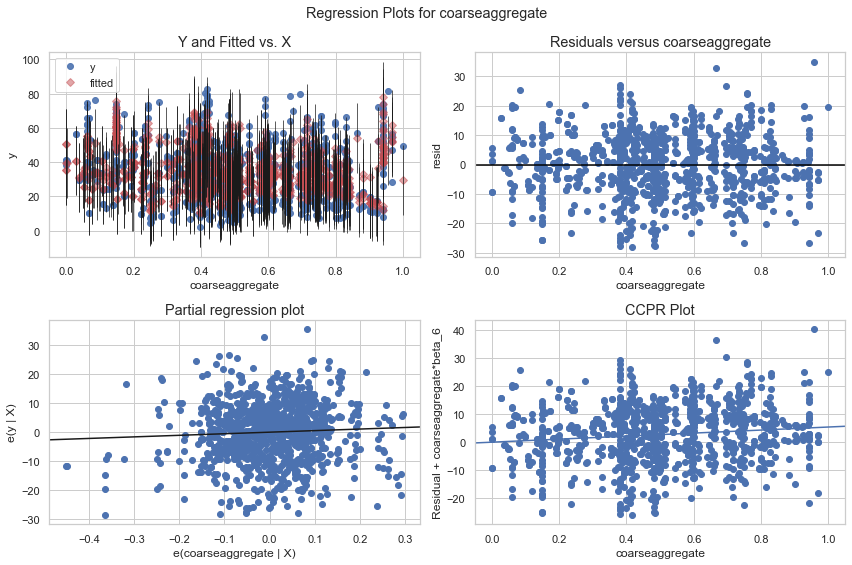

eval_env: 1


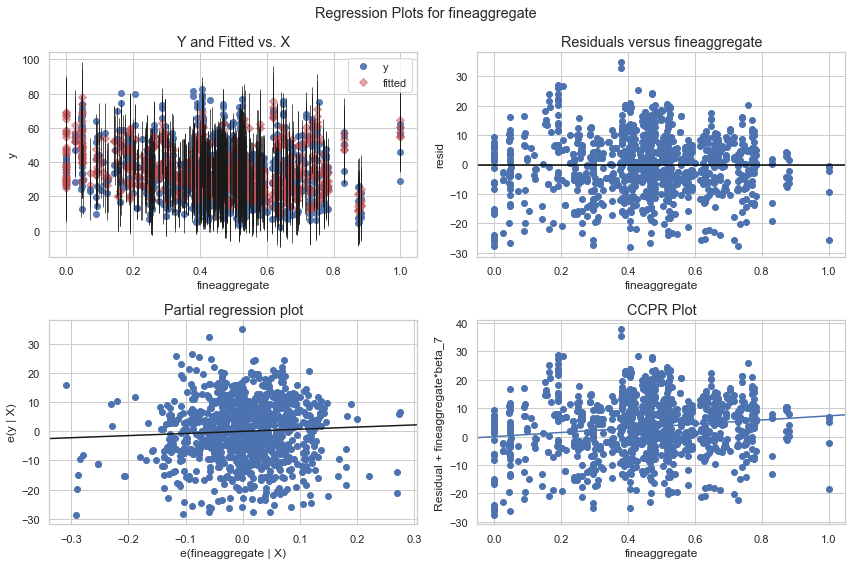

eval_env: 1


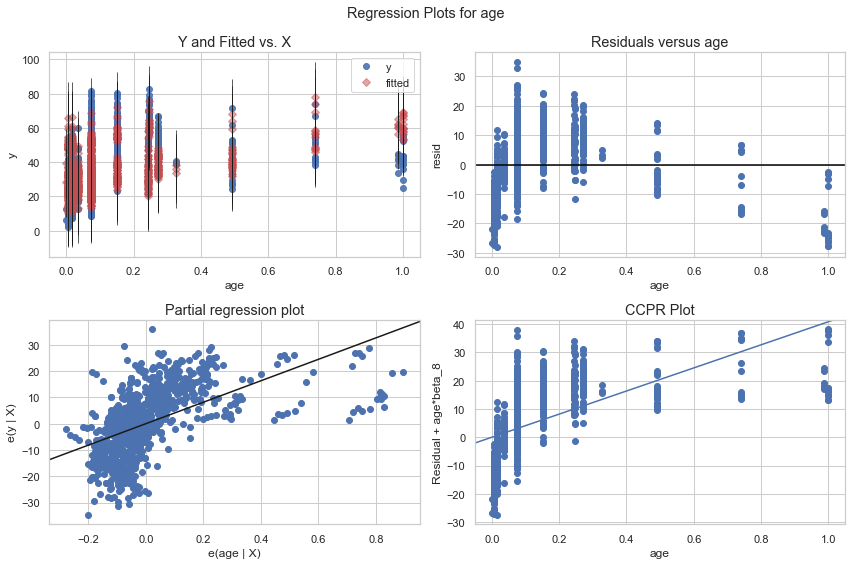

In [17]:
for i in X.columns:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(linear_model, i, fig=fig)
    plt.show()

### Intepreting the diagnostic plots above
We can see the linear relationship from the top right graph of each variable plot, and we can conclude there is a linear relationship between compressive strength and each variable, the only variable that is not showing the linear relationship is the age.

### Linear Regression, Decision Tree, Random Forest, Lasso Regression, Ridge Regression, SVM from Sklearn, and XGboost


In [18]:
#scaler
sd=MinMaxScaler()

# building pipelines for each estimator and including the scaler
lr=LinearRegression()
linear=make_pipeline(sd,lr)

kn=KNeighborsRegressor()
knn=make_pipeline(sd,kn)

dt=DecisionTreeRegressor()
decision=make_pipeline(sd,dt)

rf=RandomForestRegressor()
random=make_pipeline(sd,rf)

las=Lasso()
lasso=make_pipeline(sd,las)

rid=Ridge()
ridge=make_pipeline(sd,rid)

xg=XGBRegressor()
xgboost=make_pipeline(sd,xg)

sv=SVR()
svm=make_pipeline(sd,sv)

### Fit the models

In [19]:
linear.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [20]:
knn.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [21]:
decision.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [22]:
random.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [23]:
lasso.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('lasso', Lasso())])

In [24]:
ridge.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('ridge', Ridge())])

In [25]:
xgboost.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                 

In [26]:
svm.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR())])

### Predict on train and test sets

In [27]:
linear_y_pred_train=linear.predict(X_train)
linear_y_pred_test=linear.predict(X_test)

In [28]:
knn_y_pred_train=knn.predict(X_train)
knn_y_pred_test=knn.predict(X_test)

In [29]:
decision_y_pred_train=decision.predict(X_train)
decision_y_pred_test=decision.predict(X_test)

In [30]:
random_y_pred_train=random.predict(X_train)
random_y_pred_test=random.predict(X_test)

In [31]:
lasso_y_pred_train=lasso.predict(X_train)
lasso_y_pred_test=lasso.predict(X_test)

In [32]:
ridge_y_pred_train=ridge.predict(X_train)
ridge_y_pred_test=ridge.predict(X_test)

In [33]:
xgboost_y_pred_train=xgboost.predict(X_train)
xgboost_y_pred_test=xgboost.predict(X_test)

In [34]:
svm_y_pred_train=svm.predict(X_train)
svm_y_pred_test=svm.predict(X_test)

#### Custom functions to return mse,mae,r2, and crossval score

In [35]:
def metrics(y_true,y_pred):
    mse=mean_squared_error(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)
    
    return mse,mae,r2

In [36]:
def crossval(model):
    """
    This function returns the mean of the crossvalidation of cv=5
    and scoring = neg_mean_absolute_error
    """
    cross=np.mean(-cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_absolute_error'))
    return cross

### Apply the above functions to all of the models both on train and test sets

In [37]:
linear_mse_train,linear_mae_train,linear_r2_train=metrics(y_train,linear_y_pred_train)
linear_mse_test,linear_mae_test,linear_r2_test=metrics(y_test,linear_y_pred_test)
linear_crossval=crossval(linear)

In [38]:
knn_mse_train,knn_mae_train,knn_r2_train=metrics(y_train,knn_y_pred_train)
knn_mse_test,knn_mae_test,knn_r2_test=metrics(y_test,knn_y_pred_test)
knn_crossval=crossval(knn)

In [39]:
decision_mse_train,decision_mae_train,decision_r2_train=metrics(y_train,decision_y_pred_train)
decision_mse_test,decision_mae_test,decision_r2_test=metrics(y_test,decision_y_pred_test)
decision_crossval=crossval(decision)

In [40]:
random_mse_train,random_mae_train,random_r2_train=metrics(y_train,random_y_pred_train)
random_mse_test,random_mae_test,random_r2_test=metrics(y_test,random_y_pred_test)
random_crossval=crossval(random)

In [41]:
lasso_mse_train,lasso_mae_train,lasso_r2_train=metrics(y_train,lasso_y_pred_train)
lasso_mse_test,lasso_mae_test,lasso_r2_test=metrics(y_test,lasso_y_pred_test)
lasso_crossval=crossval(lasso)

In [42]:
ridge_mse_train,ridge_mae_train,ridge_r2_train=metrics(y_train,ridge_y_pred_train)
ridge_mse_test,ridge_mae_test,ridge_r2_test=metrics(y_test,ridge_y_pred_test)
ridge_crossval=crossval(ridge)

In [43]:
xgboost_mse_train,xgboost_mae_train,xgboost_r2_train=metrics(y_train,xgboost_y_pred_train)
xgboost_mse_test,xgboost_mae_test,xgboost_r2_test=metrics(y_test,xgboost_y_pred_test)
xgboost_crossval=crossval(xgboost)

In [44]:
svm_mse_train,svm_mae_train,svm_r2_train=metrics(y_train,svm_y_pred_train)
svm_mse_test,svm_mae_test,svm_r2_test=metrics(y_test,svm_y_pred_test)
svm_crossval=crossval(svm)

### Data frame of the above results and sort the data frame by crossval score

In [45]:
metrtic_before_tune=pd.DataFrame(columns=['model','mse train','mse test'
                                          ,'mae train','mae test','r2 train','r2 test','crossval (MAE)'])

row0={'model':'linear regression',
     'mse train':linear_mse_train,'mse test':linear_mse_test,
    'mae train':linear_mae_train,'mae test':linear_mae_test,
     'r2 train':linear_r2_train,'r2 test':linear_r2_test,'crossval (MAE)':linear_crossval}

row1={'model':'k nearest neighbors',
     'mse train':knn_mse_train,'mse test':knn_mse_test,
    'mae train':knn_mae_train,'mae test':knn_mae_test,
     'r2 train':knn_r2_train,'r2 test':knn_r2_test,'crossval (MAE)':knn_crossval}


row2={'model':'decision tree',
     'mse train':decision_mse_train,'mse test':decision_mse_test,
    'mae train':decision_mae_train,'mae test':decision_mae_test,
     'r2 train':decision_r2_train,'r2 test':decision_r2_test,'crossval (MAE)':decision_crossval}

row3={'model':'random forest',
     'mse train':random_mse_train,'mse test':random_mse_test,
    'mae train':random_mae_train,'mae test':random_mae_test,
     'r2 train':random_r2_train,'r2 test':random_r2_test,'crossval (MAE)':random_crossval}

row4={'model':'lasso regression',
     'mse train':lasso_mse_train,'mse test':lasso_mse_test,
    'mae train':lasso_mae_train,'mae test':lasso_mae_test,
     'r2 train':lasso_r2_train,'r2 test':lasso_r2_test,'crossval (MAE)':lasso_crossval}

row5={'model':'ridge regression',
     'mse train':ridge_mse_train,'mse test':ridge_mse_test,
    'mae train':ridge_mae_train,'mae test':ridge_mae_test,
     'r2 train':ridge_r2_train,'r2 test':ridge_r2_test,'crossval (MAE)':ridge_crossval}

row6={'model':'xgboost',
     'mse train':xgboost_mse_train,'mse test':xgboost_mse_test,
    'mae train':xgboost_mae_train,'mae test':xgboost_mae_test,
     'r2 train':xgboost_r2_train,'r2 test':xgboost_r2_test,'crossval (MAE)':xgboost_crossval}

row7={'model':'svm',
     'mse train':svm_mse_train,'mse test':svm_mse_test,
    'mae train':svm_mae_train,'mae test':svm_mae_test,
     'r2 train':svm_r2_train,'r2 test':svm_r2_test,'crossval (MAE)':svm_crossval}

# append to dataframe
metrtic_before_tune=metrtic_before_tune.append([row0,row1,row2,row3,row4,row5,row6,row7],ignore_index=True)

#sort by crossval
metrtic_before_tune.sort_values(by=['crossval (MAE)'],inplace=True)
metrtic_before_tune

,model,mse train,mse test,mae train,mae test,r2 train,r2 test,crossval (MAE)
6,xgboost,1.115184,16.933427,0.415054,2.813399,0.995755,0.938252,3.366511
3,random forest,4.302171,24.065143,1.358281,3.497767,0.983625,0.912247,3.751549
2,decision tree,0.871639,33.068678,0.09064,3.789371,0.996682,0.879415,4.811765
1,k nearest neighbors,57.72471,81.538519,5.653372,6.973298,0.780283,0.70267,7.387737
0,linear regression,102.205732,121.157435,8.03114,8.810947,0.610976,0.5582,8.122377
5,ridge regression,102.903657,122.42714,8.113589,8.894986,0.608319,0.55357,8.215931
7,svm,100.606935,121.425371,7.859209,8.549878,0.617061,0.557223,8.581054
4,lasso regression,216.339068,233.077289,11.946932,12.065046,0.176552,0.150084,11.954297


### Plot the above data frame

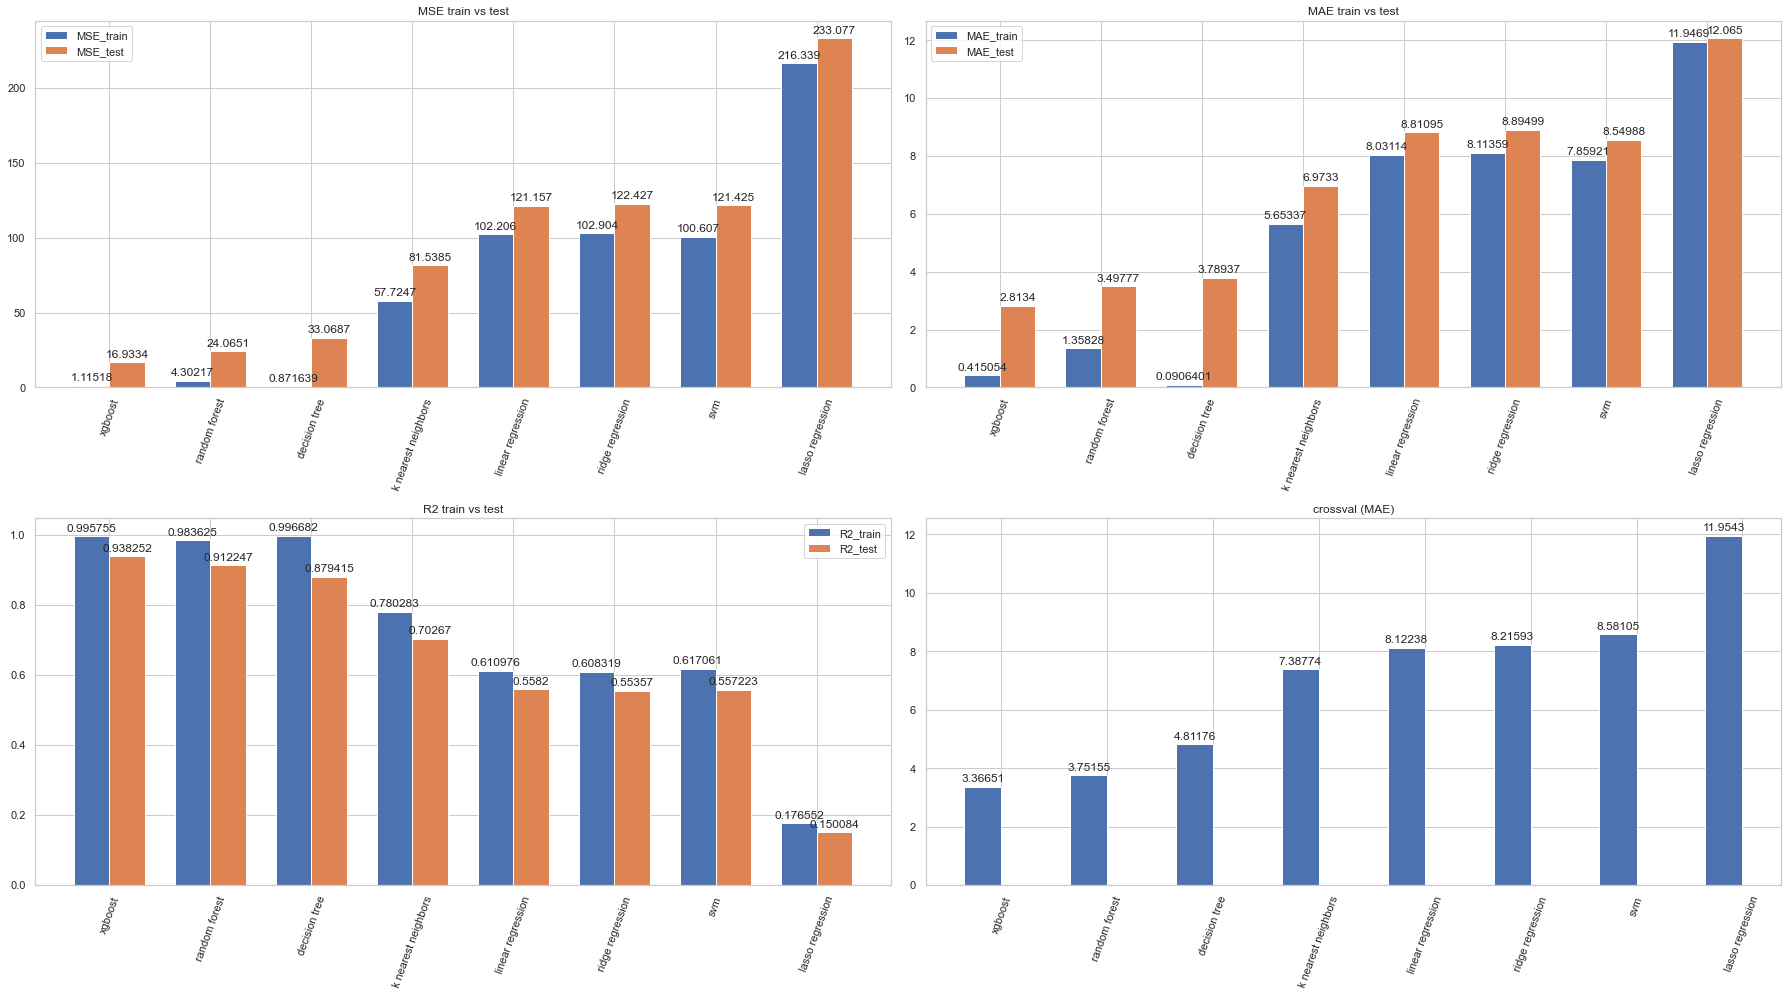

In [46]:
fig,ax=plt.subplots(2,2,figsize=(25,14),num=1)
width = 0.35  # the width of the bars
x=np.arange(len(metrtic_before_tune['model'].values))


rects1 = ax[0,0].bar(x - width/2,metrtic_before_tune['mse train'], width, label='MSE_train')
rects2 = ax[0,0].bar(x + width/2,metrtic_before_tune['mse test'], width, label='MSE_test')
ax[0,0].bar_label(rects1, padding=3)
ax[0,0].bar_label(rects2, padding=3)
ax[0,0].set_xticks(x, metrtic_before_tune['model'].values,rotation=70)
ax[0,0].set_title('MSE train vs test')
ax[0,0].legend()



rects3 = ax[0,1].bar(x - width/2,metrtic_before_tune['mae train'], width, label='MAE_train')
rects4 = ax[0,1].bar(x + width/2,metrtic_before_tune['mae test'], width, label='MAE_test')
ax[0,1].bar_label(rects3, padding=3)
ax[0,1].bar_label(rects4, padding=3)
ax[0,1].set_xticks(x, metrtic_before_tune['model'].values,rotation=70)
ax[0,1].set_title('MAE train vs test')
ax[0,1].legend()


rects5 = ax[1,0].bar(x - width/2,metrtic_before_tune['r2 train'], width, label='R2_train')
rects6 = ax[1,0].bar(x + width/2,metrtic_before_tune['r2 test'], width, label='R2_test')
ax[1,0].bar_label(rects5, padding=3)
ax[1,0].bar_label(rects6, padding=3)
ax[1,0].set_xticks(x, metrtic_before_tune['model'].values,rotation=70)
ax[1,0].set_title('R2 train vs test')
ax[1,0].legend()

rects7 = ax[1,1].bar(x - width/2,metrtic_before_tune['crossval (MAE)'], width)
ax[1,1].bar_label(rects7, padding=3)
ax[1,1].set_xticks(x, metrtic_before_tune['model'].values,rotation=70)
ax[1,1].set_title('crossval (MAE)')





plt.tight_layout()
plt.show()

### Intepreting the above visualization
##### Models that are overfitting:
We can see that our tree based models which are decision tree, random forest, and xgboost are all overfitting because they have a very low score on the training compared to the test set, and if we look at the crossvalidation scores on them we can see there is a large difference between the MAE on train set vs cross validation.

## Hyperparameter tuning and predicting on only test set

#### KNN

In [47]:
#knn
param_grid = { 'kneighborsregressor__n_neighbors' : np.arange(3,19,2),
               'kneighborsregressor__weights' : ['uniform','distance'],
               'kneighborsregressor__metric' : ['minkowski','euclidean','manhattan'],
                'kneighborsregressor__weights':['uniform','distance'],
              'kneighborsregressor__algorithm':['auto','brute','kd_tree']
              }

knn_tuned=GridSearchCV(knn,param_grid=param_grid,cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')
knn_tuned.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kneighborsregressor__algorithm': ['auto', 'brute',
                                                            'kd_tree'],
                         'kneighborsregressor__metric': ['minkowski',
                                                         'euclidean',
                                                         'manhattan'],
                         'kneighborsregressor__n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17]),
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             scoring='neg_mean_absolute_error')

In [48]:
knn_tuned=knn_tuned.best_estimator_
y_pred_knn_tuned=knn_tuned.predict(X_test)

knn_mse,knn_mae,knn_r2=metrics(y_test,y_pred_knn_tuned)
decision_crossval=crossval(knn_tuned)

In [49]:
knn_perm = PermutationImportance(knn_tuned, random_state=1).fit(X_test, y_test)
  
# display weights using PermutationImportance object
eli5.show_weights(knn_perm, feature_names = X.columns.tolist())

Weight,Feature
0.5609 ± 0.0975,cement
0.4335 ± 0.0709,age
0.2133 ± 0.0500,slag
0.1835 ± 0.0728,superplasticizer
0.1544 ± 0.0379,water
0.1418 ± 0.0579,flyash
0.1403 ± 0.0458,fineaggregate
0.1241 ± 0.0352,coarseaggregate


#### Decision Tree

In [50]:
#decision tree
param_grid = {
    'decisiontreeregressor__max_depth': np.arange(10,20),
    'decisiontreeregressor__min_samples_split':np.arange(2,10),
    'decisiontreeregressor__max_features':['auto', 'sqrt', 'log2'],
    'decisiontreeregressor__min_samples_leaf':[1,2,3,5],
    
    
    
}
    

decision_tuned=GridSearchCV(decision,param_grid=param_grid,cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')
decision_tuned.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'decisiontreeregressor__max_features': ['auto', 'sqrt',
                                                                 'log2'],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 3,
                                                                     5],
                         'decisiontreeregressor__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_absolute_error')

In [51]:
decision_tuned=decision_tuned.best_estimator_
y_pred_decision_tuned=decision_tuned.predict(X_test)

decision_mse,decision_mae,decision_r2=metrics(y_test,y_pred_decision_tuned)
decision_crossval=crossval(decision_tuned)

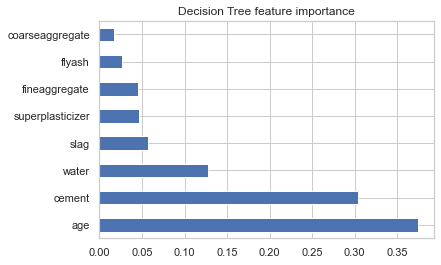

In [52]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.title('Decision Tree feature importance')
plt.show()

In [53]:
# permutation importance
decision_perm = PermutationImportance(decision_tuned, random_state=1).fit(X_test, y_test)
  
# display weights using PermutationImportance object
eli5.show_weights(decision_perm, feature_names = X.columns.tolist())

Weight,Feature
0.8892 ± 0.1866,cement
0.8362 ± 0.2317,age
0.2577 ± 0.0815,water
0.2157 ± 0.1027,slag
0.1898 ± 0.0724,superplasticizer
0.0875 ± 0.0606,fineaggregate
0.0615 ± 0.0115,flyash
0.0384 ± 0.0268,coarseaggregate


#### Random Forest

In [54]:
# random forest
param_grid={'randomforestregressor__n_estimators':[50,100,200,500],
           'randomforestregressor__bootstrap':[True,False],
           'randomforestregressor__max_depth':[None, 2, 3, 5,7,10,15],
           'randomforestregressor__min_samples_leaf':[1, 2, 5,7,9,10]
           }
random_tuned=RandomizedSearchCV(random,param_distributions=param_grid,cv=5,n_iter=200,n_jobs=-1,scoring='neg_mean_absolute_error')
random_tuned.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [None,
                                                                             2,
                                                                             3,
                                                                             5,
                                                                             7,
                                                                             10,
                                                         

In [55]:
random_tuned=random_tuned.best_estimator_
y_pred_random_tuned=random_tuned.predict(X_test)

random_mse,random_mae,random_r2=metrics(y_test,y_pred_random_tuned)
random_crossval=crossval(random_tuned)

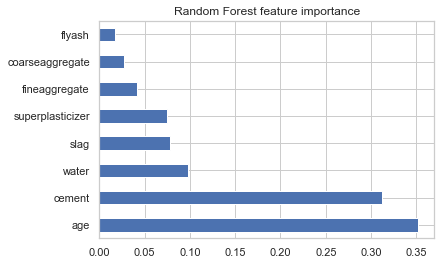

In [56]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.title('Random Forest feature importance')
plt.show()

In [57]:
# permutation importance
random_perm = PermutationImportance(random_tuned, random_state=1).fit(X_test, y_test)
  
# display weights using PermutationImportance object
eli5.show_weights(random_perm, feature_names = X.columns.tolist())

Weight,Feature
0.7571 ± 0.1098,cement
0.7347 ± 0.1603,age
0.1491 ± 0.0257,slag
0.1465 ± 0.0360,water
0.1079 ± 0.0277,superplasticizer
0.0448 ± 0.0114,fineaggregate
0.0141 ± 0.0082,coarseaggregate
0.0126 ± 0.0050,flyash


#### Lasso Regression

In [58]:
param_grid = {"lasso__alpha": np.logspace(-3, -1, 30)}
lasso_tuned=GridSearchCV(lasso,param_grid=param_grid,cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')
lasso_tuned.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([0.001     , 0.0011721 , 0.00137382, 0.00161026, 0.00188739,
       0.00221222, 0.00259294, 0.0030392 , 0.00356225, 0.00417532,
       0.0048939 , 0.00573615, 0.00672336, 0.00788046, 0.00923671,
       0.01082637, 0.01268961, 0.01487352, 0.01743329, 0.0204336 ,
       0.02395027, 0.02807216, 0.03290345, 0.0385662 , 0.04520354,
       0.05298317, 0.06210169, 0.07278954, 0.08531679, 0.1       ])},
             scoring='neg_mean_absolute_error')

In [59]:
lasso_tuned=lasso_tuned.best_estimator_
y_pred_lasso_tuned=lasso_tuned.predict(X_test)

lasso_mse,lasso_mae,lasso_r2=metrics(y_test,y_pred_lasso_tuned)
lasso_crossval=crossval(lasso_tuned)

#### Ridge Regression

In [60]:
param_grid = {"ridge__alpha": np.logspace(-3, -1, 30)}
ridge_tuned=GridSearchCV(ridge,param_grid=param_grid,cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')
ridge_tuned.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([0.001     , 0.0011721 , 0.00137382, 0.00161026, 0.00188739,
       0.00221222, 0.00259294, 0.0030392 , 0.00356225, 0.00417532,
       0.0048939 , 0.00573615, 0.00672336, 0.00788046, 0.00923671,
       0.01082637, 0.01268961, 0.01487352, 0.01743329, 0.0204336 ,
       0.02395027, 0.02807216, 0.03290345, 0.0385662 , 0.04520354,
       0.05298317, 0.06210169, 0.07278954, 0.08531679, 0.1       ])},
             scoring='neg_mean_absolute_error')

In [61]:
ridge_tuned=ridge_tuned.best_estimator_
y_pred_ridge_tuned=ridge_tuned.predict(X_test)

ridge_mse,ridge_mae,ridge_r2=metrics(y_test,y_pred_lasso_tuned)
ridge_crossval=crossval(ridge_tuned)

#### XGboost

In [62]:
param_grid={'xgbregressor__max_depth': [3, 5, 6, 10, 15, 20],
           'xgbregressor__learning_rate': [0.01, 0.1, 0.2, 0.3],
           'xgbregressor__subsample': np.arange(0.5, 1.0, 0.1),
           'xgbregressor__colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'xgbregressor__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'xgbregressor__n_estimators': [100, 500, 1000]}

xgboost_tuned=RandomizedSearchCV(xgboost,param_distributions=param_grid,cv=5,
                                 n_iter=35,n_jobs=-1,scoring='neg_mean_absolute_error')
xgboost_tuned.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=0.5,
                                                           booster='gbtree',
                                                           callbacks=None,
                                                           colsample_bylevel=1,
                                                           colsample_bynode=1,
                                                           colsample_bytree=1,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           gamma=0, gpu_id=-1,
                                         

In [63]:
xgboost_tuned=xgboost_tuned.best_estimator_

y_pred_xgboost_tuned=xgboost_tuned.predict(X_test)

xgboost_mse,xgboost_mae,xgboost_r2=metrics(y_test,y_pred_xgboost_tuned)
xgboost_crossval=crossval(xgboost_tuned)

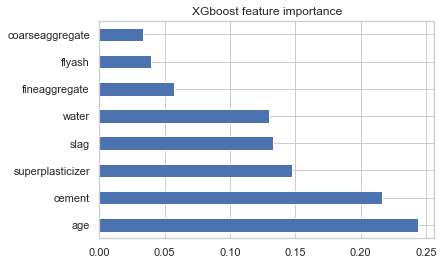

In [64]:
feat_importances = pd.Series(xg.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.title('XGboost feature importance')
plt.show()

In [65]:
# permutation importance
xgboost_perm = PermutationImportance(xgboost_tuned, random_state=1).fit(X_test, y_test)
  
# display weights using PermutationImportance object
eli5.show_weights(xgboost_perm, feature_names = X.columns.tolist())

Weight,Feature
0.7032 ± 0.1629,age
0.6234 ± 0.0745,cement
0.2621 ± 0.0551,water
0.1222 ± 0.0117,slag
0.0653 ± 0.0086,fineaggregate
0.0580 ± 0.0165,superplasticizer
0.0511 ± 0.0103,coarseaggregate
0.0101 ± 0.0103,flyash


#### SVM

In [66]:
param_grid = {'svr__C': [0.1, 1, 10, 100, 1000],
              'svr__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svr__kernel':['linear', 'poly', 'rbf', 'sigmoid']
              }
svm_tuned=RandomizedSearchCV(svm,param_distributions=param_grid,cv=5,
                             n_iter=30,n_jobs=-1,scoring='neg_mean_absolute_error')
svm_tuned.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('svr', SVR())]),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'svr__C': [0.1, 1, 10, 100, 1000],
                                        'svr__gamma': [1, 0.1, 0.01, 0.001,
                                                       0.0001],
                                        'svr__kernel': ['linear', 'poly', 'rbf',
                                                        'sigmoid']},
                   scoring='neg_mean_absolute_error')

In [67]:
svm_tuned=svm_tuned.best_estimator_

y_pred_svm_tuned=svm_tuned.predict(X_test)

svm_mse,svm_mae,svm_r2=metrics(y_test,y_pred_svm_tuned)
svm_crossval=crossval(svm_tuned)

In [68]:
# permutation importance
svm_perm = PermutationImportance(svm_tuned, random_state=1).fit(X_test, y_test)
  
# display weights using PermutationImportance object
eli5.show_weights(svm_perm, feature_names = X.columns.tolist())

Weight,Feature
2.8907 ± 3.1222,age
1.8921 ± 0.4193,cement
1.1774 ± 1.3119,superplasticizer
0.6259 ± 0.1047,slag
0.6193 ± 0.4927,flyash
0.2645 ± 0.0874,water
0.2395 ± 0.1002,fineaggregate
0.1833 ± 0.0846,coarseaggregate


### Data frame of the tuned results

In [69]:
model=['k nearest neighbors','decision tree', 'random forest', 'lasso regression',
      'ridge regression','xgboost','svm']

tuned_mse=[knn_mse,decision_mse,random_mse,lasso_mse,ridge_mse,xgboost_mse,svm_mse]

tuned_mae=[knn_mae,decision_mae,random_mae,lasso_mae,ridge_mae,xgboost_mae,svm_mae]

tuned_r2=[knn_r2,decision_r2,random_r2,lasso_r2,ridge_r2,xgboost_r2,svm_r2]

tuned_cross_vals= [knn_crossval,decision_crossval,random_crossval,lasso_crossval,ridge_crossval,
                 xgboost_crossval,svm_crossval]


metric_after_tune=pd.DataFrame({'model':model,'tuned_mse':tuned_mse,'tuned_mae':tuned_mae,
                                'tuned_r2':tuned_r2,
                                'tuned_crossval_MAE':tuned_cross_vals})

metric_after_tune.sort_values(by=['tuned_crossval_MAE'],inplace=True)
metric_after_tune

,model,tuned_mse,tuned_mae,tuned_r2,tuned_crossval_MAE
5,xgboost,14.824346,2.531462,0.945943,2.935269
2,random forest,22.914023,3.414102,0.916444,3.691258
6,svm,56.339423,5.334152,0.794558,4.736151
1,decision tree,33.911398,3.900629,0.876342,4.804735
0,k nearest neighbors,65.782014,5.815548,0.760126,7.387737
4,ridge regression,121.150999,8.813008,0.558223,8.122493
3,lasso regression,121.150999,8.813008,0.558223,8.125497


### Plot the above data frame

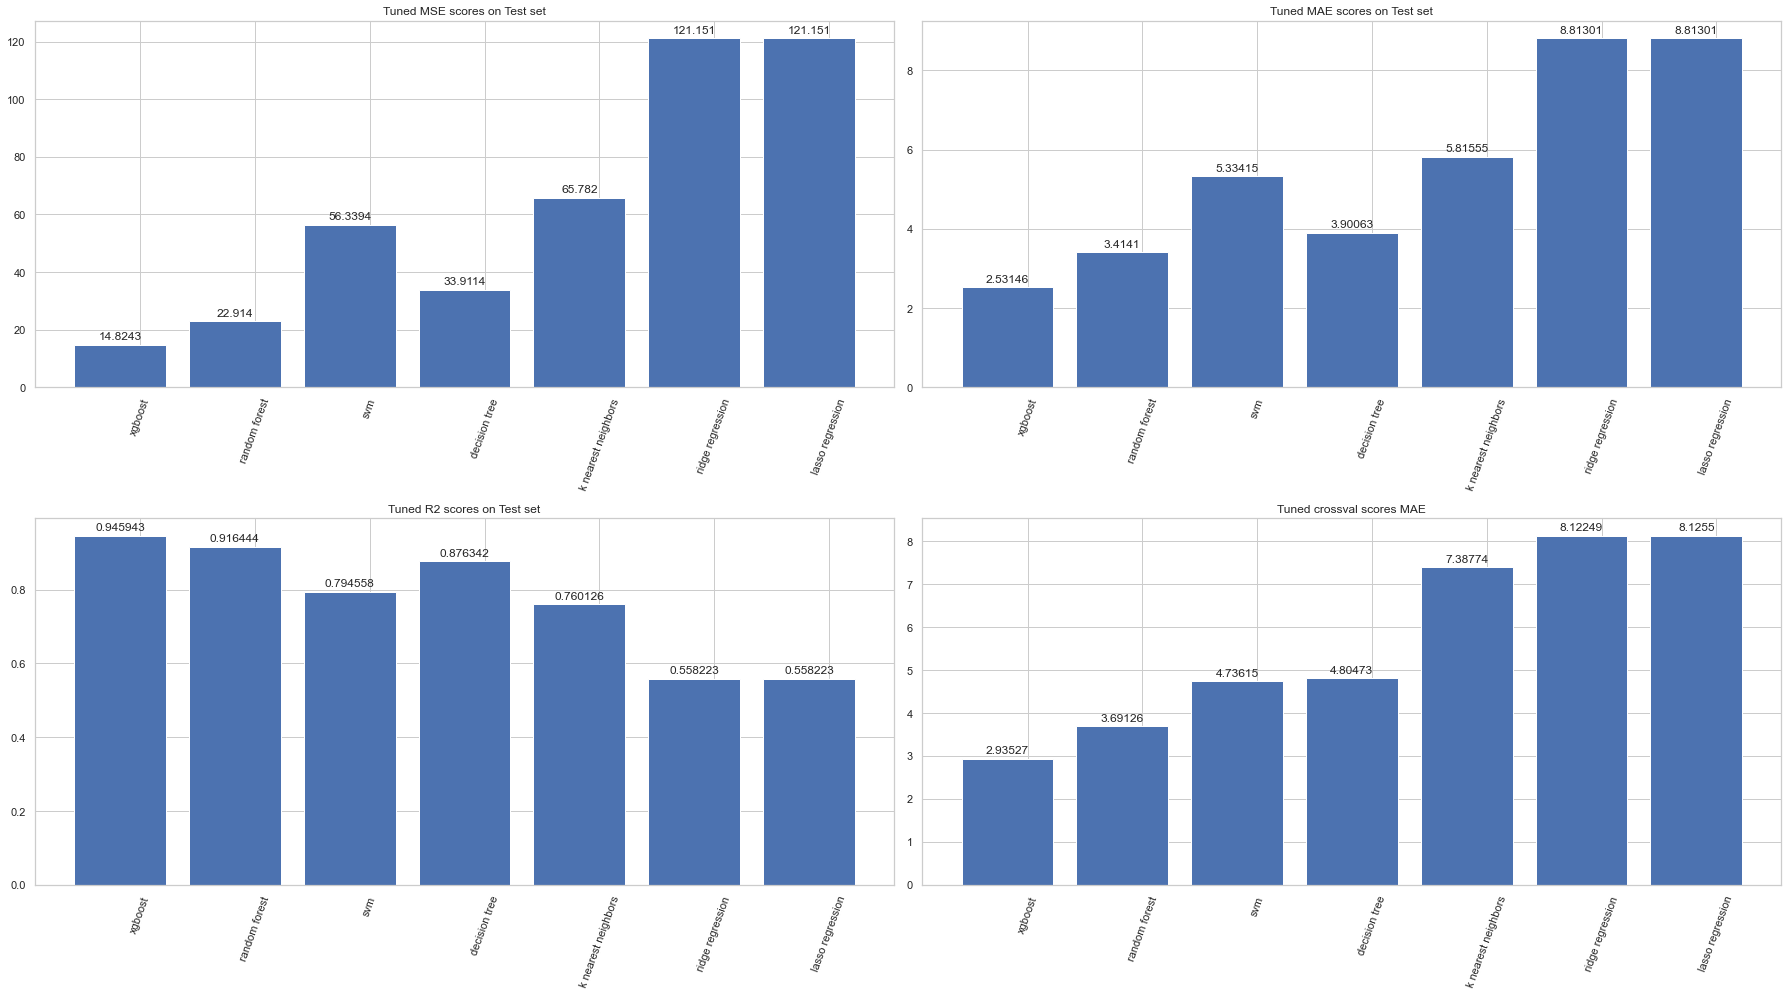

In [70]:
fig,ax=plt.subplots(2,2,figsize=(25,14),num=1)
width = 0.35  # the width of the bars
x=np.arange(len(metric_after_tune['model'].values))


rects1 = ax[0,0].bar(x - width/2,metric_after_tune['tuned_mse'])
ax[0,0].bar_label(rects1, padding=3)
ax[0,0].set_xticks(x, metric_after_tune['model'].values,rotation=70)
ax[0,0].set_title('Tuned MSE scores on Test set')



rects2 = ax[0,1].bar(x - width/2,metric_after_tune['tuned_mae'])
ax[0,1].bar_label(rects2, padding=3)
ax[0,1].set_xticks(x, metric_after_tune['model'].values,rotation=70)
ax[0,1].set_title('Tuned MAE scores on Test set')



rects3 = ax[1,0].bar(x - width/2,metric_after_tune['tuned_r2'])
ax[1,0].bar_label(rects3, padding=3)
ax[1,0].set_xticks(x, metric_after_tune['model'].values,rotation=70)
ax[1,0].set_title('Tuned R2 scores on Test set')




rects4 = ax[1,1].bar(x - width/2,metric_after_tune['tuned_crossval_MAE'])
ax[1,1].bar_label(rects4, padding=3)
ax[1,1].set_xticks(x, metric_after_tune['model'].values,rotation=70)
ax[1,1].set_title('Tuned crossval scores MAE')


plt.tight_layout()
plt.show()

### Intepreting of the above visualizations
##### Best models:
We can see that xgboost, random forest, and decision tree have the lowest MAE on cross validation and also have the highest R2.

### Visualizing crossvalidation before and after hyperparameter tuning

In [71]:
metric_no_linear=metrtic_before_tune.loc[metrtic_before_tune['model']!='linear regression']

In [104]:
pre_tune=metric_no_linear[['model','crossval (MAE)']]
post_tune=metric_after_tune[['model','tuned_crossval_MAE']]
comparison_df=pd.merge(pre_tune, post_tune, on='model')
comparison_df=comparison_df.sort_values(by=['tuned_crossval_MAE'])

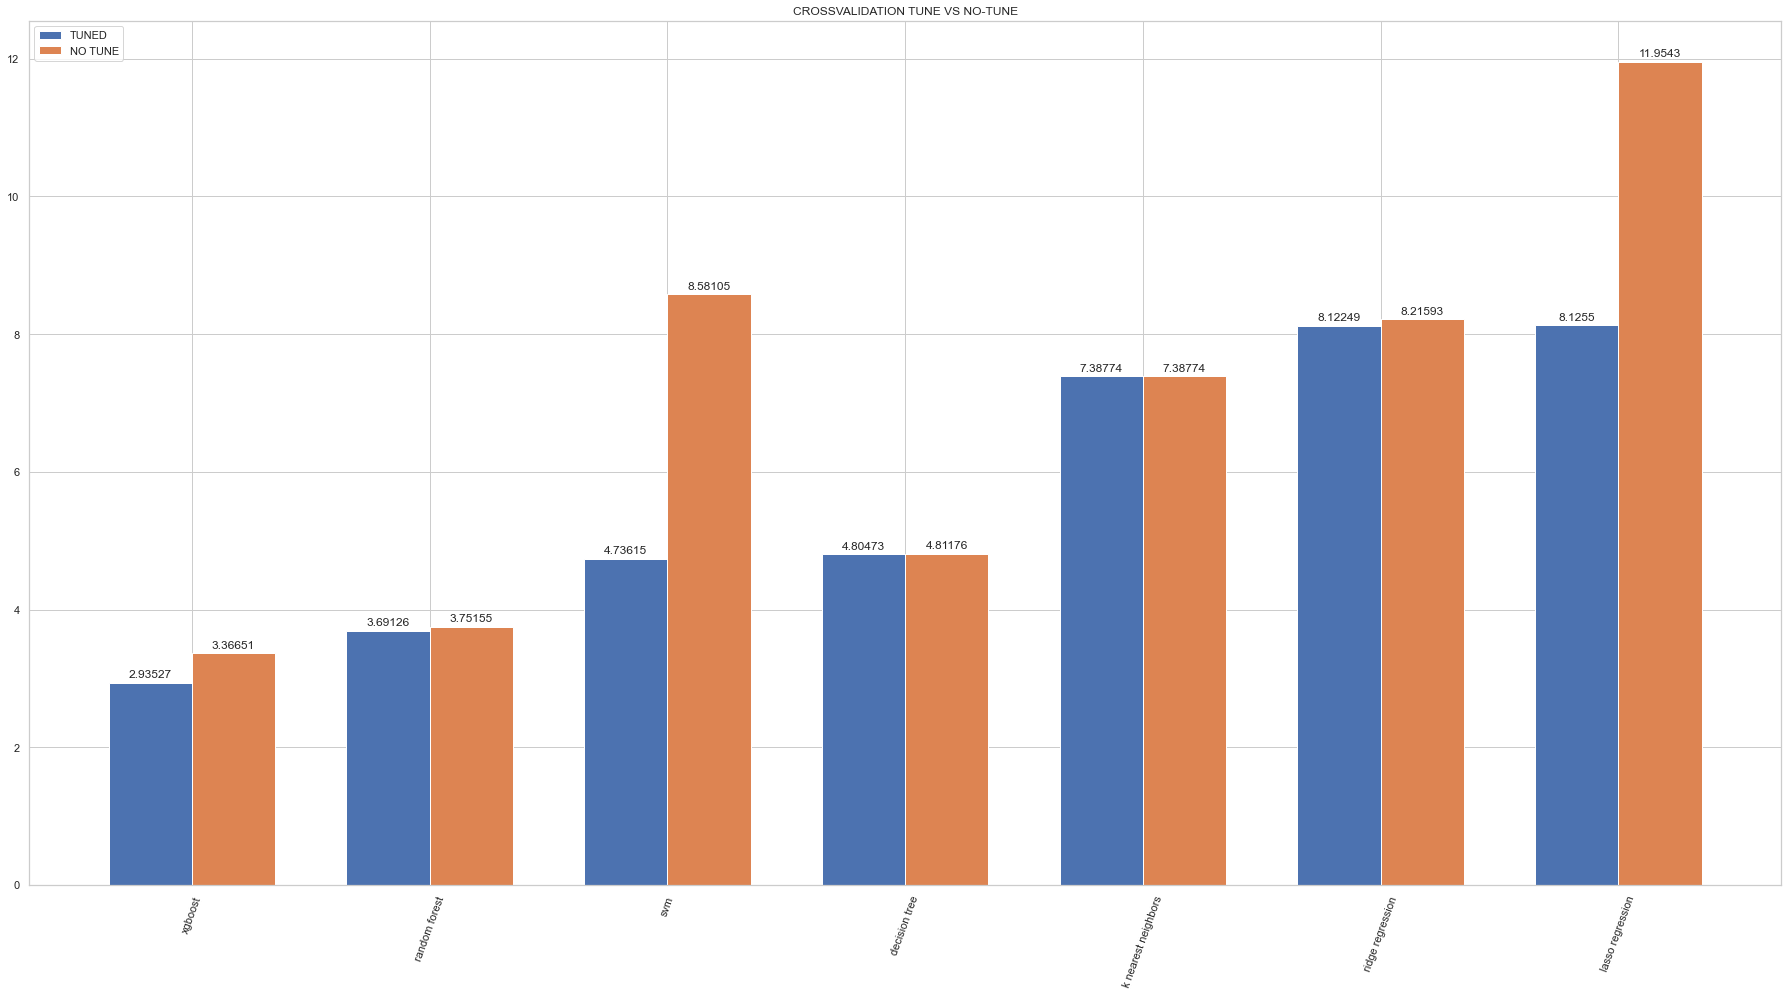

In [105]:
fig,ax=plt.subplots(1,figsize=(25,14),num=1)

width = 0.35  # the width of the bars
x=np.arange(len(comparison_df['model'].values))


rects1 = ax.bar(x - width/2,comparison_df['tuned_crossval_MAE'], width, label='TUNED')
rects2 = ax.bar(x + width/2,comparison_df['crossval (MAE)'], width, label='NO TUNE')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_xticks(x, comparison_df['model'].values,rotation=70)
ax.set_title('CROSSVALIDATION TUNE VS NO-TUNE')
ax.legend(loc='upper left',shadow=False, scatterpoints=1)

plt.tight_layout()
plt.show()

### Intepreting of the above visualizations
All of our models except lasso and ridge got an improved score after the tune

## Voting regressor on the top 2 best models
We will crossvalidate and predict on test set

In [73]:
vt=VotingRegressor([('random',random_tuned),('sv',svm_tuned),('xg',xgboost_tuned)])

vt.fit(X_train,y_train)
y_pred_vt=vt.predict(X_test)

vote_crossval=crossval(vt)
vote_mse,vote_mae,vote_r2=metrics(y_test,y_pred_vt)

In [74]:
print(f'CROSSVAL : {vote_crossval}')
print(f'MSE : {vote_mse}')
print(f'MAE : {vote_mae}')
print(f'R2 : {vote_r2}')

CROSSVAL : 3.1965645229534223
MSE : 19.33534913028064
MAE : 3.0406865792279674
R2 : 0.9294936881310792


### Hyperparameter tuning for voting regressor

In [75]:
param_grid={'weights':[(1,1,1),(1,2,2),(1,2,3),(1,2,1),(1,1,4),(1,2,5),(1,1,5)]}
vote_tuned=GridSearchCV(vt,param_grid=param_grid,cv=5,n_jobs=-1
                        ,scoring='neg_mean_absolute_error')
vote_tuned.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('random',
                                                    Pipeline(steps=[('minmaxscaler',
                                                                     MinMaxScaler()),
                                                                    ('randomforestregressor',
                                                                     RandomForestRegressor(n_estimators=500))])),
                                                   ('sv',
                                                    Pipeline(steps=[('minmaxscaler',
                                                                     MinMaxScaler()),
                                                                    ('svr',
                                                                     SVR(C=1000,
                                                                         gamma=1,
                                                                        

In [76]:
vote_tuned.best_params_

{'weights': (1, 1, 5)}

In [77]:
vote_tuned=vote_tuned.best_estimator_
y_pred_vote_tuned=vote_tuned.predict(X_test)
vote_crossval_tuned=crossval(vote_tuned)
vote_tuned_mse,vote_tuned_mae,vote_tuned_r2=metrics(y_test,y_pred_vote_tuned)

In [78]:
print(f'CROSSVAL : {vote_crossval_tuned}')
print(f'MSE : {vote_tuned_mse}')
print(f'MAE : {vote_tuned_mae}')
print(f'R2 : {vote_tuned_r2}')

CROSSVAL : 2.8958468502232253
MSE : 14.316195176036183
MAE : 2.5064146378297014
R2 : 0.9477960229703235


### Add voting regressor to the plot

In [106]:
comparison_df=comparison_df.append({'model':'voting_regressor','crossval (MAE)':vote_crossval,'tuned_crossval_MAE':vote_crossval_tuned},ignore_index=True)
comparison_df=comparison_df.sort_values(by=['tuned_crossval_MAE'])

In [107]:
comparison_df

,model,crossval (MAE),tuned_crossval_MAE
7,voting_regressor,3.196565,2.895847
0,xgboost,3.366511,2.935269
1,random forest,3.751549,3.691258
2,svm,8.581054,4.736151
3,decision tree,4.811765,4.804735
4,k nearest neighbors,7.387737,7.387737
5,ridge regression,8.215931,8.122493
6,lasso regression,11.954297,8.125497


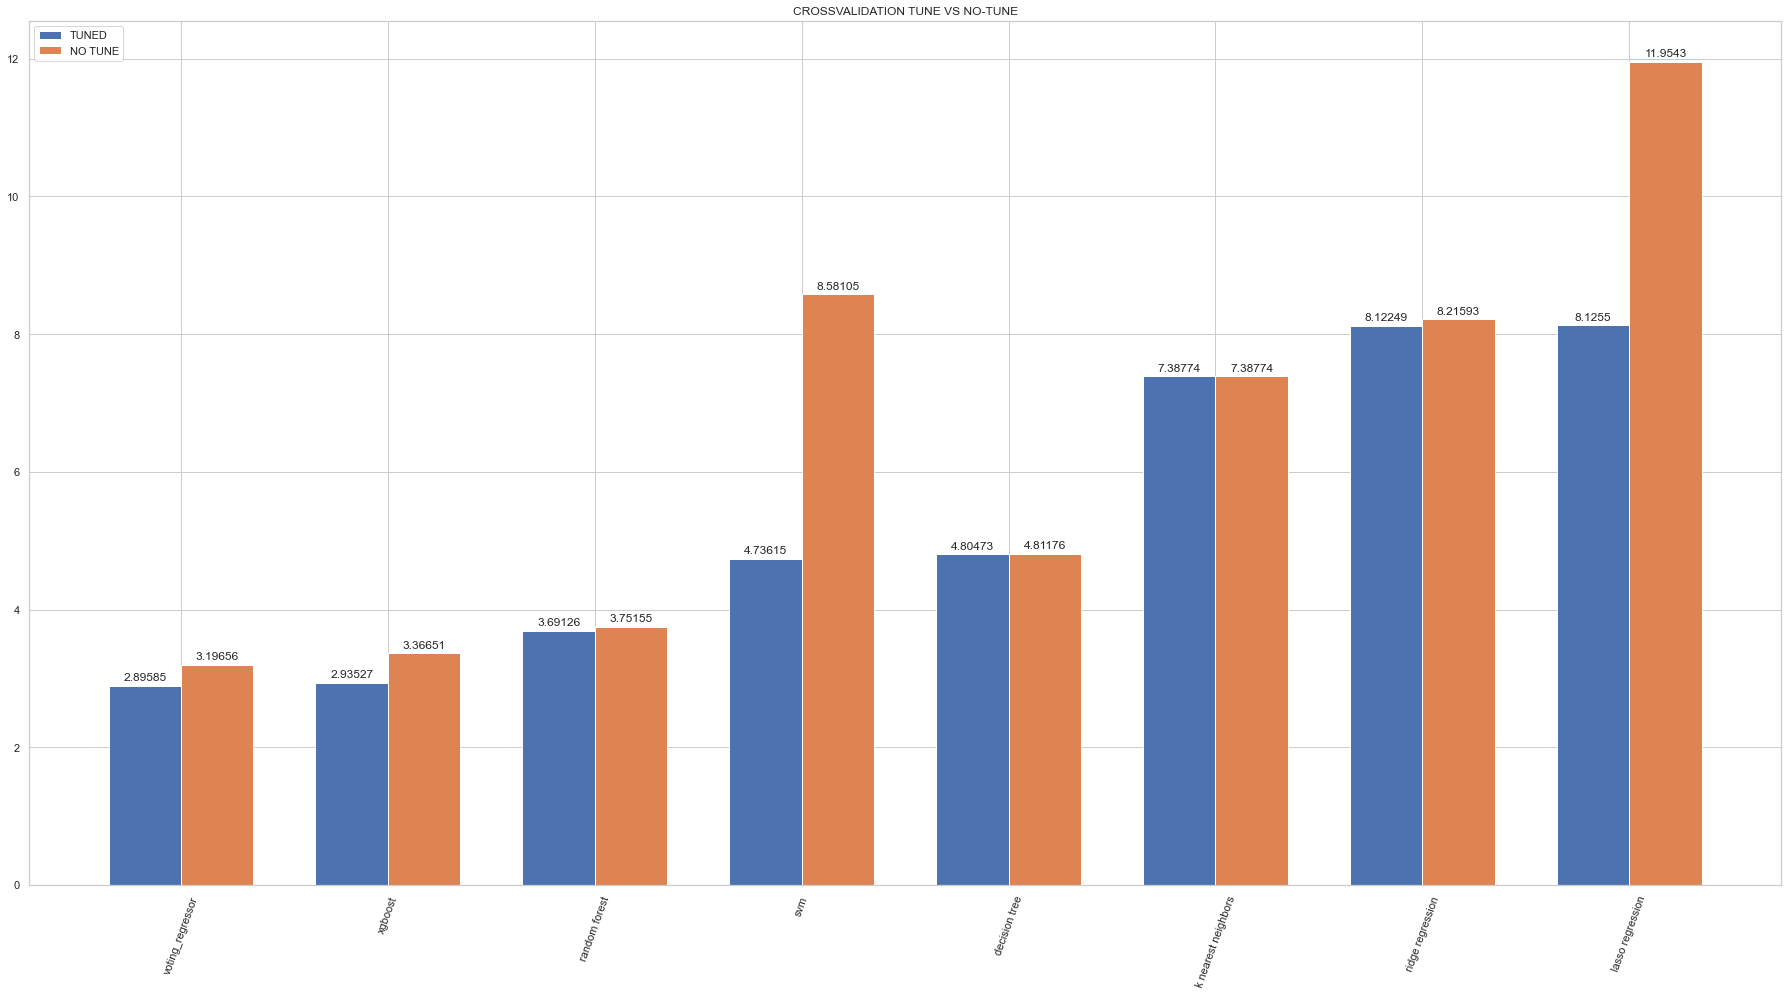

In [108]:
fig,ax=plt.subplots(1,figsize=(25,14),num=1)

width = 0.35  # the width of the bars
x=np.arange(len(comparison_df['model'].values))


rects1 = ax.bar(x - width/2,comparison_df['tuned_crossval_MAE'], width, label='TUNED')
rects2 = ax.bar(x + width/2,comparison_df['crossval (MAE)'], width, label='NO TUNE')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_xticks(x, comparison_df['model'].values,rotation=70)
ax.set_title('CROSSVALIDATION TUNE VS NO-TUNE')
ax.legend(loc='upper left',shadow=False, scatterpoints=1)

plt.tight_layout()
plt.show()

In [109]:
# permutation importance
vote_perm = PermutationImportance(vote_tuned, random_state=1).fit(X_test, y_test)
  
# display weights using PermutationImportance object
eli5.show_weights(vote_perm, feature_names = X.columns.tolist())

Weight,Feature
0.7480 ± 0.0800,cement
0.6944 ± 0.0940,age
0.2274 ± 0.0466,water
0.1593 ± 0.0194,slag
0.0770 ± 0.0312,superplasticizer
0.0532 ± 0.0113,fineaggregate
0.0428 ± 0.0084,coarseaggregate
0.0172 ± 0.0140,flyash


### Best model
Best model according to the lowest cross validation RMAE is the voting regressor of the tuned Support vector machine, Random forest, and XGboost, and by tuning the parameters we were able to get the best result by having the weights of 1 to support vector machine, 1 to random forest, and 5 to XGboost, our lowest and best cross validation score is 2.89

### Save the models

In [110]:
pickle.dump(knn_tuned,open('knn','wb'))
pickle.dump(decision_tuned,open('dt','wb'))
pickle.dump(random_tuned,open('rf','wb'))
pickle.dump(xgboost_tuned,open('xg','wb'))
pickle.dump(vote_tuned,open('vt','wb'))